# Chicago Crime Analysis
##### By Ibrahim Patel

In [1]:
# Import Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap,HeatMapWithTime


In [3]:
# Import dataset
df_original = pd.read_csv('Chicago_Crimes_2012_to_2017.csv.zip')

In [4]:
# Make a copy of the dataset and work on that.
df = df_original.copy()

# Data Cleaning

In [5]:
# I want to see the number of crime types
df['Primary Type'].nunique()

33

In [6]:
# I want to see any null values
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [7]:
# I want to drop the null values
df.dropna(inplace = True)

In [8]:
# I want to see how many rows and columns i have
df.shape

(1418365, 23)

In [9]:
# Check for any duplicated values
df.duplicated().sum()

0

In [10]:
# Check the data types of my columns
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [11]:
# Checking the shape of my coordinates to makes sure they match
df['Latitude'].shape

(1418365,)

In [12]:
df['Longitude'].shape

(1418365,)

In [13]:
df.Location

0          (41.864073157, -87.706818608)
1           (41.782921527, -87.60436317)
2          (41.894908283, -87.758371958)
3          (41.885686845, -87.749515983)
4          (41.886297242, -87.761750709)
5          (41.745354023, -87.603798903)
6          (41.844023772, -87.626923253)
7           (41.811133958, -87.62074077)
8           (41.99813061, -87.665814038)
9          (41.768096835, -87.663878589)
10         (41.761733286, -87.558309979)
11         (41.893026751, -87.626750829)
12         (41.877811861, -87.655758012)
13          (41.843016958, -87.61722727)
14         (41.910900826, -87.686018747)
15         (41.762089133, -87.696632337)
16         (41.908237096, -87.678437417)
17         (41.793935909, -87.625680278)
18         (41.711843569, -87.646607932)
19         (41.815875211, -87.601832565)
20         (41.910116718, -87.677444645)
21         (41.790704614, -87.606141486)
22         (41.927321839, -87.665810418)
23         (41.995961517, -87.797528563)
24         (41.8

In [14]:
# I am turning the coordinates into a list.
df['Location'][0][1:-1].split(',')

['41.864073157', ' -87.706818608']

In [15]:
# I am using a map function so it applies to every cell and a lambda function that will make a function on the fly.
# the lambda function is doing a split on each coordinate on the comma
df['Location'] = df['Location'].map(lambda item: item[1:-1].split(','))

In [16]:
df['Location'] = df['Location'].map(lambda x: [float(x[0]), float(x[1])])

In [17]:
# checking to see my columns
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [18]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"[41.864073157, -87.706818608]"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"[41.782921527, -87.60436317]"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"[41.894908283, -87.758371958]"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"[41.885686845, -87.749515983]"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"[41.886297242, -87.761750709]"


In [19]:
# Dropped any columns I felt like I did not need.
df = df.drop(['FBI Code','X Coordinate', 'Y Coordinate','Beat','Updated On'], axis = 1)

In [20]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'District', 'Ward', 'Community Area', 'Year', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [21]:
# Check to see my number of columns
len(df.columns)

18

In [22]:
# Check the shape of my data after all the cleaning
df.shape

(1418365, 18)

In [23]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,24.0,29.0,2016,41.864073,-87.706819,"[41.864073157, -87.706818608]"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,20.0,42.0,2016,41.782922,-87.604363,"[41.782921527, -87.60436317]"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,37.0,25.0,2016,41.894908,-87.758372,"[41.894908283, -87.758371958]"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,28.0,25.0,2016,41.885687,-87.749516,"[41.885686845, -87.749515983]"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,28.0,25.0,2016,41.886297,-87.761751,"[41.886297242, -87.761750709]"


In [24]:
# Get the value counts of the crimes committed
df['Primary Type'].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [25]:
# df of all the murders
homies_df =  df[df['Primary Type'] == 'HOMICIDE']

In [26]:
# Data Frame of all Narcotics
drugs_df = df[df['Primary Type']== 'NARCOTICS']

In [27]:
drugs_df.shape

(131177, 18)

In [28]:
homies_df.shape

(2590, 18)

In [29]:
# See the nummbers of arrest made for homicides
homies_df['Arrest'].value_counts()

False    1731
True      859
Name: Arrest, dtype: int64

In [30]:
# Group each crime by Location, then reset the index so they become columns
location = homies_df.groupby(['Latitude','Longitude']).agg({'ID':'count'}).reset_index()

In [31]:
# Rename the column ID to count
location=  location.rename({'ID':'Count'}, axis=1)

In [32]:
# I turned the homicides location into a list so it would be easy to put in the heatmap.
homi_cords = [(x[0],x[1],x[2]) for x in location.values]

In [33]:
homi_cords;

# Visualizations

In [34]:
# I Used the mean latitude and longitude to create a base map of chicago.

chicago = folium.Map([homies_df['Latitude'].mean(), homies_df['Longitude'].mean()], zoom_start = 10)
HeatMap(homi_cords, radius = 10).add_to(chicago)


chicago

In [35]:
HeatMap(homi_cords, radius = 5).add_to(chicago)


In [36]:
# Made a dataframe of all the arrest made
arrest_df = df[df['Arrest']== True]
arrest_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,24.0,29.0,2016,41.864073,-87.706819,"[41.864073157, -87.706818608]"
10,1935,10508710,HZ250469,05/03/2016 09:44:00 PM,074XX S SOUTH SHORE DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,True,False,3.0,7.0,43.0,2016,41.761733,-87.558310,"[41.761733286, -87.558309979]"
11,2150,10508715,HZ250541,05/03/2016 11:11:00 PM,006XX N WABASH AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,18.0,42.0,8.0,2016,41.893027,-87.626751,"[41.893026751, -87.626750829]"
56,11666,10509422,HZ250945,05/04/2016 11:15:00 AM,083XX S STEWART AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,6.0,21.0,44.0,2016,41.742710,-87.634088,"[41.742710224, -87.634088181]"
82,18272,10509460,HZ250952,05/04/2016 11:30:00 AM,071XX S JEFFERY BLVD,1330,CRIMINAL TRESPASS,TO LAND,DRUG STORE,True,False,3.0,5.0,43.0,2016,41.765756,-87.576292,"[41.765755571, -87.576292427]"


In [37]:
# Wanted to see whats are crimes where the most arrest were made
arrest_df['Primary Type'].value_counts()

NARCOTICS                            130277
BATTERY                               59999
THEFT                                 36301
CRIMINAL TRESPASS                     25714
ASSAULT                               21180
OTHER OFFENSE                         18318
WEAPONS VIOLATION                     13593
CRIMINAL DAMAGE                       10077
PUBLIC PEACE VIOLATION                 9910
DECEPTIVE PRACTICE                     8787
PROSTITUTION                           7533
INTERFERENCE WITH PUBLIC OFFICER       5816
ROBBERY                                5436
BURGLARY                               4428
MOTOR VEHICLE THEFT                    4199
GAMBLING                               2204
LIQUOR LAW VIOLATION                   1887
OFFENSE INVOLVING CHILDREN             1755
SEX OFFENSE                            1153
HOMICIDE                                859
CRIM SEXUAL ASSAULT                     762
ARSON                                   215
STALKING                        

In [38]:
# The 15 lowest occurring types of crimes.
df['Primary Type'].value_counts()[-15:]

HOMICIDE                             2590
GAMBLING                             2211
ARSON                                2175
LIQUOR LAW VIOLATION                 1928
KIDNAPPING                           1075
STALKING                              774
INTIMIDATION                          643
OBSCENITY                             169
CONCEALED CARRY LICENSE VIOLATION      84
NON-CRIMINAL                           80
PUBLIC INDECENCY                       61
NON - CRIMINAL                         38
OTHER NARCOTIC VIOLATION               30
HUMAN TRAFFICKING                      20
NON-CRIMINAL (SUBJECT SPECIFIED)        4
Name: Primary Type, dtype: int64

In [39]:
df['Primary Type'].value_counts()[:-17]

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
PROSTITUTION                    7567
CRIM SEXUAL ASSAULT             6298
Name: Primary Type, dtype: int64

In [40]:
# Made a dataframe where there are certain crimes in primary types. These are the top 15 crimes
n_df= df[df['Primary Type'].isin(['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT',                      
'OTHER OFFENSE' ,'BURGLARY' ,'DECEPTIVE PRACTICE','MOTOR VEHICLE THEFT','ROBBERY',
'CRIMINAL TRESPASS', 'WEAPONS VIOLATION','PUBLIC PEACE VIOLATION','OFFENSE INVOLVING CHILDREN',
'CRIM SEXUAL ASSAULT'])]

In [41]:
n_df['Primary Type'].value_counts()

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
CRIM SEXUAL ASSAULT             6298
Name: Primary Type, dtype: int64

In [42]:
n_df.shape

(1388289, 18)

In [43]:
# make a new data frame of just the crime types and their count
brand_newdf = n_df['Primary Type']

In [44]:
brand_newdf.value_counts()

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
CRIM SEXUAL ASSAULT             6298
Name: Primary Type, dtype: int64

In [45]:
brand_newdf.head()

0                   BATTERY
1                   BATTERY
2    PUBLIC PEACE VIOLATION
3                   BATTERY
4                     THEFT
Name: Primary Type, dtype: object

In [46]:
# turn it into a pandas datafrane for easy data manipulation
brand_newdf = pd.DataFrame(brand_newdf)

In [47]:
brand_newdf.head()

,Primary Type
0,BATTERY
1,BATTERY
2,PUBLIC PEACE VIOLATION
3,BATTERY
4,THEFT


In [48]:
# run a groupby for crime tpye
brand_newdf = brand_newdf.groupby('Primary Type').agg({'Primary Type':'count'})

In [49]:
# get just the counts of the crimes
countsss = brand_newdf.reset_index(drop=True)
countsss['Primary Type']

0      89508
1     258941
2      81668
3       6298
4     152812
5      36429
6      67609
7      59856
8     131177
9      10590
10     85361
11     13015
12     56092
13    321950
14     16983
Name: Primary Type, dtype: int64

In [50]:
#Turn the index into a list
crime_list = list(brand_newdf.index)

In [51]:
crime_list

['ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'THEFT',
 'WEAPONS VIOLATION']

In [52]:
# Reset the index then Drop it
brand_newdf.reset_index(drop=True)
crime_count = brand_newdf

In [53]:
# Turn the counts into a list
crime_count = list(countsss['Primary Type'])

In [54]:
crime_count

[89508,
 258941,
 81668,
 6298,
 152812,
 36429,
 67609,
 59856,
 131177,
 10590,
 85361,
 13015,
 56092,
 321950,
 16983]

In [55]:
# Turn these list into a data frame 
newer_df = pd.DataFrame(crime_list)

In [56]:
newer_df['Count'] = pd.DataFrame(crime_count)

In [57]:
newer_df= newer_df.rename(columns = {0:'Crime'})

In [58]:
# Sort the Values by Count from largest to smallest
newer_df = newer_df.sort_values(by = 'Count', ascending=False)

# More Visuals

<Figure size 1440x1440 with 0 Axes>

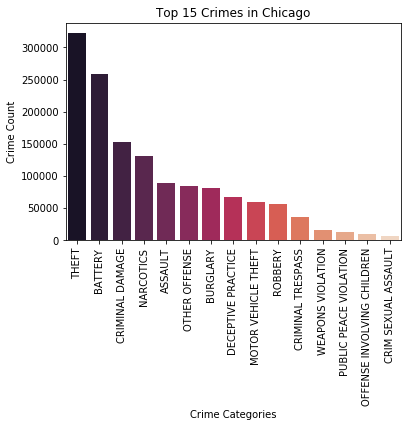

<Figure size 1440x1440 with 0 Axes>

In [59]:
# Use seaborn to make a nice bar chart with the 15 most occuring crimes in chicago

ax = sns.barplot(x=newer_df['Crime'], y= newer_df['Count'], palette = 'rocket')
plt.xticks(rotation= 90);
ax.set(xlabel='Crime Categories', ylabel= 'Crime Count')
plt.title("Top 15 Crimes in Chicago");
plt.figure(figsize=[20,20])

In [60]:
newer_df.head()

,Crime,Count
13,THEFT,321950
1,BATTERY,258941
4,CRIMINAL DAMAGE,152812
8,NARCOTICS,131177
0,ASSAULT,89508


In [61]:
# Made a dataframe of the top 15 crimes where arrest were made.
arrest_for_top15_df = arrest_df[arrest_df['Primary Type'].isin(['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT',                      
'OTHER OFFENSE' ,'BURGLARY' ,'DECEPTIVE PRACTICE','MOTOR VEHICLE THEFT','ROBBERY',
'CRIMINAL TRESPASS', 'WEAPONS VIOLATION','PUBLIC PEACE VIOLATION','OFFENSE INVOLVING CHILDREN',
'CRIM SEXUAL ASSAULT'])]

In [62]:
# Make a base map of chicago using the mean latitude and longitude of all all crimes
chicago_base_map = folium.Map(location =[(df['Latitude'].mean()),(df['Longitude'].mean())])
chicago_base_map

In [63]:
# Converted the date dtype from object to datetime
arrest_for_top15_df['Date'] = pd.to_datetime(arrest_for_top15_df['Date'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
# Checking to see if it worked, and it did.
arrest_for_top15_df.dtypes

Unnamed: 0                       int64
ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [65]:
# Run a groupby on location. Then reset the index
arrest_location = arrest_for_top15_df.groupby(['Latitude','Longitude']).agg({'ID':'count'}).reset_index()

In [66]:
arrest_location.head()

,Latitude,Longitude,ID
0,36.619446,-91.686566,17
1,41.644608,-87.613055,1
2,41.644818,-87.614692,1
3,41.645076,-87.574483,1
4,41.645153,-87.541642,1


In [67]:
arrest_for_top15_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,24.0,29.0,2016,41.864073,-87.706819,"[41.864073157, -87.706818608]"
10,1935,10508710,HZ250469,2016-05-03 21:44:00,074XX S SOUTH SHORE DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,True,False,3.0,7.0,43.0,2016,41.761733,-87.558310,"[41.761733286, -87.558309979]"
11,2150,10508715,HZ250541,2016-05-03 23:11:00,006XX N WABASH AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,18.0,42.0,8.0,2016,41.893027,-87.626751,"[41.893026751, -87.626750829]"
56,11666,10509422,HZ250945,2016-05-04 11:15:00,083XX S STEWART AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,6.0,21.0,44.0,2016,41.742710,-87.634088,"[41.742710224, -87.634088181]"
82,18272,10509460,HZ250952,2016-05-04 11:30:00,071XX S JEFFERY BLVD,1330,CRIMINAL TRESPASS,TO LAND,DRUG STORE,True,False,3.0,5.0,43.0,2016,41.765756,-87.576292,"[41.765755571, -87.576292427]"


In [68]:
# Run a groupby on the Crime type to get the count. Then sort the crimes in order by count from highest to lowest
top_15_arrest = arrest_for_top15_df.groupby('Primary Type').agg({'ID':'count'},axis=1).sort_values(by='ID', ascending = False)
# Rename the ID column as count
top_15_arrest.rename({'ID':'Count'},axis=1,inplace=True)

In [69]:
top_15_arrest.head()

,Count
Primary Type,
NARCOTICS,130277
BATTERY,59999
THEFT,36301
CRIMINAL TRESPASS,25714
ASSAULT,21180


<Figure size 720x720 with 0 Axes>

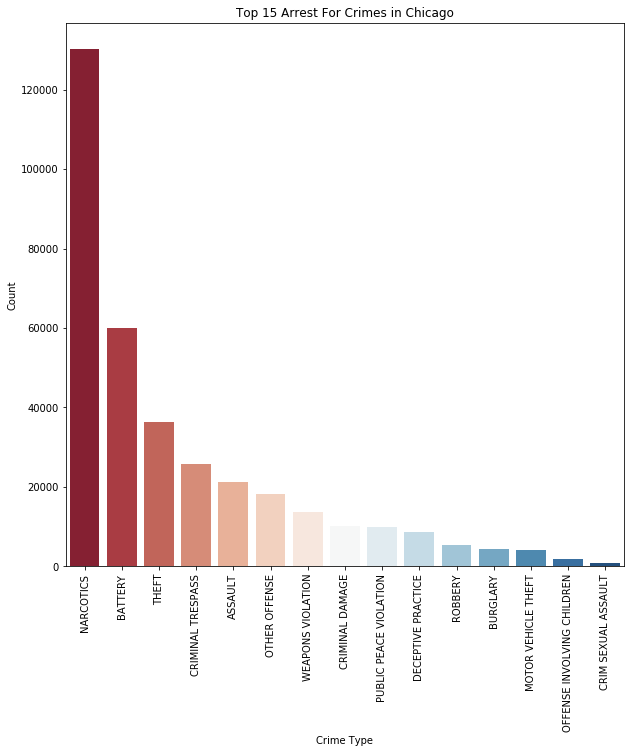

<Figure size 720x720 with 0 Axes>

In [70]:
# make bar plot of top 15 arrest using seaborn
plt.figure(figsize=(10,10))
ARchart = sns.barplot(top_15_arrest.index, y=top_15_arrest['Count'], palette = 'RdBu')
plt.xticks(rotation=90);
plt.title('Top 15 Arrest For Crimes in Chicago');
ARchart.set(xlabel='Crime Type',ylabel='Count')
plt.figure(figsize=[10,10])

In [71]:
# I need date crime and count in a new df and then scatter plot it

In [72]:
# Turn the date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
# Drop uneeded columns
df.drop(['Description', 'Location','Latitude',
       'Longitude', 'Location','Domestic', 'District'], axis =1, inplace =True)

In [74]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Location Description', 'Arrest', 'Ward',
       'Community Area', 'Year'],
      dtype='object')

In [75]:
df.drop(['Location Description','Ward','Block', 'IUCR'], axis=1, inplace=True)

In [76]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Primary Type', 'Arrest',
       'Community Area', 'Year'],
      dtype='object')

In [77]:
df.drop(['Community Area', 'Year'],axis=1, inplace=True)

In [78]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Primary Type,Arrest
0,3,10508693,HZ250496,2016-05-03 23:40:00,BATTERY,True
1,89,10508695,HZ250409,2016-05-03 21:40:00,BATTERY,False
2,197,10508697,HZ250503,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False
3,673,10508698,HZ250424,2016-05-03 22:10:00,BATTERY,False
4,911,10508699,HZ250455,2016-05-03 22:00:00,THEFT,False


In [79]:
arrest_for_top15_df.drop(['Description', 'Location','Latitude',
       'Longitude', 'Location','Domestic', 'District','Location Description',
        'Ward','Block', 'IUCR','Community Area', 'Year' ], axis =1, inplace =True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
arrest_crimes_grouped = arrest_for_top15_df.groupby(['Date']).agg({'ID':'count'},axis=1).sort_values('ID', ascending=False)

In [81]:
arrest_crimes_grouped.rename({'ID':'Count'}, axis=1, inplace=True)

In [82]:
arrest_crimes_grouped.reset_index(inplace=True)

In [83]:
arrest_crimes_grouped.sort_values('Date').head()

,Date,Count
23,2012-01-01 00:00:00,7
2,2012-01-01 00:01:00,11
46982,2012-01-01 00:02:00,2
200315,2012-01-01 00:03:00,1
11985,2012-01-01 00:05:00,3


In [84]:
# Now that we have a total number of crimes for each day,
# it would be easier to visualize if we had the total crime for each month
# that is what resample does and we take the sum of the arrest per month
months_arrest = arrest_crimes_grouped.set_index('Date').resample('M').sum()
# resample is very important in regards to time. It generates a unique sampling distribution for months in this case

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


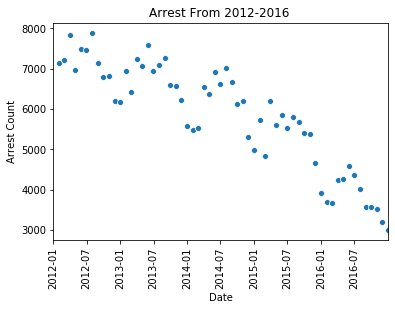

In [85]:
# This scatter plot shows us the number of arrest made per month from 2012 2016.
# X is the time so I called the index because it is grouped by months
# Y is the arrest counts because that is what I am measuring
_2012_chart = sns.scatterplot(months_arrest.index, y = months_arrest['Count'])
# Xlim lets us choose where we wants to start and end the X-axis
plt.xlim('2012-01-01 00:00:00', '2016-12-31 23:41:00')
plt.xticks(rotation = 90);
plt.title('Arrest From 2012-2016 ');
plt.ylabel('Arrest Count');

# Possible Time Series???

In [86]:
non_arrest = df[df.Arrest == False]

In [87]:
non_arrest.shape

(1047308, 6)

In [88]:
non_arrest.head()

,Unnamed: 0,ID,Case Number,Date,Primary Type,Arrest
1,89,10508695,HZ250409,2016-05-03 21:40:00,BATTERY,False
2,197,10508697,HZ250503,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,False
3,673,10508698,HZ250424,2016-05-03 22:10:00,BATTERY,False
4,911,10508699,HZ250455,2016-05-03 22:00:00,THEFT,False
5,1108,10508702,HZ250447,2016-05-03 22:35:00,BATTERY,False


In [89]:
non_arrest_grouped = non_arrest.groupby(['Date','Primary Type']).agg({'ID':'count'},axis=1).sort_values('ID', ascending=False)

In [90]:
non_arrest_grouped.head()

,,ID
Date,Primary Type,
2012-01-01 00:01:00,THEFT,57
2013-01-01 09:00:00,THEFT,46
2012-01-01 09:00:00,THEFT,43
2014-06-13 08:00:00,THEFT,35
2012-06-01 09:00:00,THEFT,31


In [91]:
non_arrest_grouped.rename({'ID':'Count'}, axis=1,inplace=True)

In [92]:
non_arrest_grouped.reset_index(inplace=True)

In [93]:
months_non_arrest = non_arrest_grouped.set_index('Date').resample('M').sum()

In [94]:
months_non_arrest.head()

,Count
Date,
2012-01-31,18468
2012-02-29,16149
2012-03-31,20068
2012-04-30,19686
2012-05-31,22099


Text(0, 0.5, 'Crime Count')

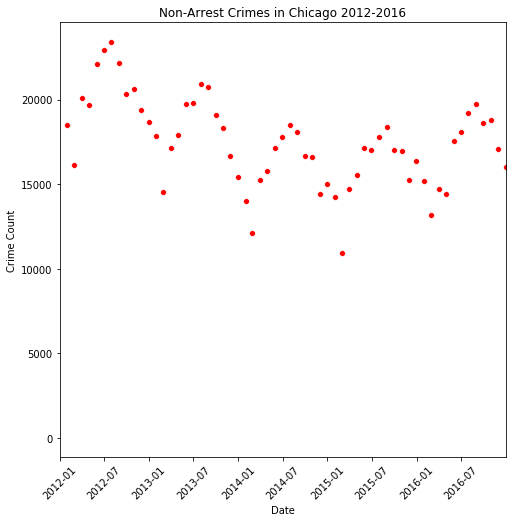

In [95]:
# This scatter plot shows us the number of non-arrest made per month from 2012 2016.
# X is the time so I called the index because it is grouped by months
# Y is the non-arrest counts because that is what I am measuring
plt.figure(figsize=[8,8])
sns.scatterplot(x=months_non_arrest.index, y=months_non_arrest['Count'],color='Red');
plt.title('Non-Arrest Crimes in Chicago 2012-2016')
plt.xlim('2012-01-01 00:00:00', '2016-12-31 23:41:00');
#xlim is so my chart only shows the chart starting and stopping at said intervals
plt.xticks(rotation = 45);
plt.ylabel('Crime Count')